#Project : Build a Movie Recommendation System 


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [ ]:

data1=pd.read_csv('/content/TMDB_10000_Popular_Movies.csv')

In [ ]:
data2=pd.read_csv('/content/TMDB_7000_Top_Rated_Movies.csv')

In [ ]:
data=pd.concat([data1,data2], axis='rows')

In [ ]:
data.head(2)

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,Release_Status,Original_Language,Languages_Spoken,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue
0,419704,tt2935510,Ad Astra,Ad Astra,"The near future, a time when both hope and har...",Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019-09-17,Released,en,English | Norsk,123.0,The answers we seek are just outside our reach,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0
1,338762,tt1634106,Bloodshot,Bloodshot,"After he and his wife are murdered, marine Ray...",Action | Science Fiction,Vin Diesel | Eiza González | Sam Heughan | Tob...,John Papsidera | Matthew Vaughn | Jim May | Ne...,Single,2020-03-05,Released,en,English,110.0,Being a superhero is in his blood,235.701,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0


##Data Preprocessing

In [ ]:
data.shape

(17101, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17101 entries, 0 to 7100
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TMDb_Id               17101 non-null  int64  
 1   IMDb_Id               17029 non-null  object 
 2   Title                 17101 non-null  object 
 3   Original_Title        17101 non-null  object 
 4   Overview              17060 non-null  object 
 5   Genres                17030 non-null  object 
 6   Cast                  17043 non-null  object 
 7   Crew                  17088 non-null  object 
 8   Collection            17100 non-null  object 
 9   Release_Date          17098 non-null  object 
 10  Release_Status        17100 non-null  object 
 11  Original_Language     17101 non-null  object 
 12  Languages_Spoken      17014 non-null  object 
 13  Runtime               17085 non-null  float64
 14  Tagline               13429 non-null  object 
 15  Popularity          

In [ ]:
data['Languages_Spoken'].unique()

array(['English | Norsk', 'English', 'Español | English', ...,
       'Català | Español | Français | Galego | English',
       'Español | Français | Polski | Português',
       'Français | Nederlands | Português'], dtype=object)

In [ ]:
data["Original_Language"].unique()

array(['en', 'fr', 'es', 'tr', 'ko', 'tl', 'ja', 'it', 'id', 'ru', 'pl',
       'cn', 'da', 'hi', 'sv', 'zh', 'no', 'lv', 'ro', 'ar', 'el', 'ta',
       'sq', 'de', 'ml', 'th', 'nl', 'pt', 'sr', 'mk', 'te', 'xx', 'hu',
       'is', 'sh', 'fa', 'cs', 'la', 'he', 'pa', 'nb', 'bs', 'vi', 'eu',
       'fi', 'af', 'ab', 'ka', 'ms', 'mr', 'et', 'uk'], dtype=object)

In [ ]:
data=data.drop('Languages_Spoken',axis=1)

In [ ]:
data["Original_Language"]=data["Original_Language"].replace("hi","hindi")
data["Original_Language"]=data["Original_Language"].replace("en","english")

In [ ]:
data["Original_Language"].unique()

array(['english', 'fr', 'es', 'tr', 'ko', 'tl', 'ja', 'it', 'id', 'ru',
       'pl', 'cn', 'da', 'hindi', 'sv', 'zh', 'no', 'lv', 'ro', 'ar',
       'el', 'ta', 'sq', 'de', 'ml', 'th', 'nl', 'pt', 'sr', 'mk', 'te',
       'xx', 'hu', 'is', 'sh', 'fa', 'cs', 'la', 'he', 'pa', 'nb', 'bs',
       'vi', 'eu', 'fi', 'af', 'ab', 'ka', 'ms', 'mr', 'et', 'uk'],
      dtype=object)

In [ ]:
print (data['Release_Date'].dtype)
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

print (data['Release_Date'].dtype)
data['year_of_release'] = data['Release_Date'].dt.year


object
datetime64[ns]


In [ ]:
data['movie_Id'] = data['TMDb_Id'].astype(int)
data.head(1)

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,Release_Status,Original_Language,Runtime,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,year_of_release,movie_Id
0,419704,tt2935510,Ad Astra,Ad Astra,"The near future, a time when both hope and har...",Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019-09-17,Released,english,123.0,The answers we seek are just outside our reach,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0,2019.0,419704


In [ ]:
data.keys()

Index(['TMDb_Id', 'IMDb_Id', 'Title', 'Original_Title', 'Overview', 'Genres',
       'Cast', 'Crew', 'Collection', 'Release_Date', 'Release_Status',
       'Original_Language', 'Runtime', 'Tagline', 'Popularity',
       'Rating_average', 'Rating_Count', 'Production_Companies',
       'Country_of_Origin', 'Budget', 'Revenue', 'year_of_release',
       'movie_Id'],
      dtype='object')

In [ ]:
data.isnull().sum()

TMDb_Id                    0
IMDb_Id                   72
Title                      0
Original_Title             0
Overview                  41
Genres                    71
Cast                      58
Crew                      13
Collection                 1
Release_Date               3
Release_Status             1
Original_Language          0
Runtime                   16
Tagline                 3672
Popularity                 0
Rating_average             0
Rating_Count               0
Production_Companies     382
Country_of_Origin        133
Budget                     1
Revenue                    1
year_of_release            3
movie_Id                   0
dtype: int64

In [ ]:
#As we have more number of missing data in 'Tagline' column. So, we have merged the 'Tagline' and 'Overview'
data.iloc[100].Tagline

'The Untold True Story'

In [ ]:
data.iloc[100].Overview

'The untold true story set in the winter of 1925 that takes you across the treacherous terrain of the Alaskan tundra for an exhilarating and uplifting adventure that will test the strength, courage and determination of one man, Leonhard Seppala, and his lead sled dog, Togo.'

In [ ]:
data["Tagline"].replace(np.nan,".",inplace=True) 

In [ ]:
data["Overview"].replace(np.nan,".",inplace=True) 

In [ ]:
data["Tagline"].value_counts()

.                                                                 3672
Based on a true story.                                              11
Be careful what you wish for.                                        7
The legend comes to life.                                            5
Awaken to a World of Wonders!                                        4
                                                                  ... 
Close your eyes and the adventure begins.                            1
In the Ghettos of Harlem you don't buy respect... you earn it.       1
First you find the sharks. Then they find you.                       1
In this daring heist, the only color that counts is green            1
The last site you'll ever see.                                       1
Name: Tagline, Length: 7815, dtype: int64

In [ ]:
data["tag_final"]=data["Overview"]+data["Tagline"]

In [ ]:
data=data.drop(["Overview","Tagline"],axis=1)
data.head(1)

,TMDb_Id,IMDb_Id,Title,Original_Title,Genres,Cast,Crew,Collection,Release_Date,Release_Status,Original_Language,Runtime,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,year_of_release,movie_Id,tag_final
0,419704,tt2935510,Ad Astra,Ad Astra,Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019-09-17,Released,english,123.0,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0,2019.0,419704,"The near future, a time when both hope and har..."


In [ ]:
data.isnull().sum()

TMDb_Id                   0
IMDb_Id                  72
Title                     0
Original_Title            0
Genres                   71
Cast                     58
Crew                     13
Collection                1
Release_Date              3
Release_Status            1
Original_Language         0
Runtime                  16
Popularity                0
Rating_average            0
Rating_Count              0
Production_Companies    382
Country_of_Origin       133
Budget                    1
Revenue                   1
year_of_release           3
movie_Id                  0
tag_final                 0
dtype: int64

In [ ]:
data.dropna()

,TMDb_Id,IMDb_Id,Title,Original_Title,Genres,Cast,Crew,Collection,Release_Date,Release_Status,Original_Language,Runtime,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,year_of_release,movie_Id,tag_final
0,419704,tt2935510,Ad Astra,Ad Astra,Drama | Science Fiction,Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...,Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...,Single,2019-09-17,Released,english,123.0,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0,2019.0,419704,"The near future, a time when both hope and har..."
1,338762,tt1634106,Bloodshot,Bloodshot,Action | Science Fiction,Vin Diesel | Eiza González | Sam Heughan | Tob...,John Papsidera | Matthew Vaughn | Jim May | Ne...,Single,2020-03-05,Released,english,110.0,235.701,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0,2020.0,338762,"After he and his wife are murdered, marine Ray..."
2,38700,tt1502397,Bad Boys for Life,Bad Boys for Life,Action | Crime | Thriller,Will Smith | Martin Lawrence | Paola Nuñez | V...,Jerry Bruckheimer | Mike Stenson | Chad Oman |...,Bad Boys Collection,2020-01-15,Released,english,124.0,255.068,7.1,2596,Columbia Pictures | Platinum Dunes | 2.0 Enter...,France | United States of America,0.0,191150000.0,2020.0,38700,Marcus and Mike are forced to confront new thr...
3,102899,tt0478970,Ant-Man,Ant-Man,Action | Adventure | Science Fiction,Paul Rudd | Michael Douglas | Evangeline Lilly...,David Lazan | Jackie Burch | Sala Baker | Sala...,Ant-Man Collection,2015-07-14,Released,english,117.0,134.294,7.1,13625,Marvel Studios,United States of America,130000000.0,519311965.0,2015.0,102899,Armed with the astonishing ability to shrink i...
4,76285,tt1854564,Percy Jackson: Sea of Monsters,Percy Jackson: Sea of Monsters,Adventure | Fantasy | Family,Logan Lerman | Alexandra Daddario | Douglas Sm...,Mark Goldblatt | Shelly Johnson | Karen Rosenf...,Percy Jackson Collection,2013-08-07,Released,english,106.0,124.417,5.9,3547,Fox 2000 Pictures | Sunswept Entertainment | 1...,United States of America,90000000.0,199850315.0,2013.0,76285,"In their quest to confront the ultimate evil, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,13805,tt1213644,Disaster Movie,Disaster Movie,Action | Comedy,Matt Lanter | Vanessa Lachey | Crista Flanagan...,Peck Prior | Jason Friedberg | Jason Friedberg...,Single,2008-08-29,Released,english,87.0,11.902,3.1,597,3 in the Box | Lionsgate | Grosvenor Park Medi...,United States of America,25000000.0,14109284.0,2008.0,13805,"The filmmaking team behind the hits ""Scary Mov..."
7097,74849,tt0193524,The Star Wars Holiday Special,The Star Wars Holiday Special,Adventure | Comedy | Science Fiction | Family ...,Harrison Ford | Mark Hamill | Anthony Daniels ...,George Lucas | Ben Burtt | Garrett Lewis | Pat...,Single,1978-12-01,Released,english,97.0,9.147,3.0,238,20th Century Fox Television | Smith-Hemion Pro...,United States of America,0.0,0.0,1978.0,74849,Luke Skywalker and Han Solo battle evil Imperi...
7098,5491,tt0185183,Battlefield Earth,Battlefield Earth,Action | Science Fiction | War,John Travolta | Barry Pepper | Forest Whitaker...,Lynn Stalmaster | Giles Nuttgens | Roger Chris...,Single,2000-05-10,Released,english,118.0,9.749,2.9,462,Morgan Creek Productions | Franchise Pictures ...,United States of America,44000000.0,21400000.0,2000.0,5491,"In the year 3000, man is no match for the Psyc..."
7099,11059,tt0317676,House of the Dead,House of the Dead,Action | Horror | Thriller,Jonathan Cherry | Tyron Leitso | Clint Howard ...,Dan Sales | Uwe Boll | Uwe Boll | Mathias Neum...,House of the Dead Collection,2003-04-11,Released,english,90.0,8.388,2.9,207,Herold Productions | Boll Kino Beteiligungs Gm...,Canada | Germany | United States of America,7000000.0,13818181.0,2003.0,11059,"Set on an island off the c

In [ ]:
data.duplicated().sum()

6215

In [ ]:
data=data.drop_duplicates(keep='first')

In [ ]:
data.describe(include='all')

,TMDb_Id,IMDb_Id,Title,Original_Title,Genres,Cast,Crew,Collection,Release_Date,Release_Status,Original_Language,Runtime,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,year_of_release,movie_Id,tag_final
count,10886.000000,10815,10886,10886,10817,10833,10873,10885,10883,10885,10886,10871.000000,10886.000000,10886.000000,10886.000000,10543,10758,1.088500e+04,1.088500e+04,10883.000000,10886.000000,10886
unique,NaN,10578,10307,10375,1534,10589,10613,1049,6183,5,52,NaN,NaN,NaN,NaN,8567,915,NaN,NaN,NaN,NaN,10602
top,NaN,tt0290673,Dracula,Dracula,Comedy,Dave Chappelle,"Yasuichiro Yamamoto , Gosho Aoyama",Single,2020-04-09 00:00:00,Released,english,NaN,NaN,NaN,NaN,Paramount,United States of America,NaN,NaN,NaN,NaN,..
freq,NaN,2,5,5,754,3,3,8357,35,10768,8768,NaN,NaN,NaN,NaN,120,5815,NaN,NaN,NaN,NaN,40
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,150947.267591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.768927,13.333157,6.323471,1032.841356,NaN,NaN,1.908673e+07,5.634178e+07,2003.528071,150947.267591,NaN
std,194220.588737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.465790,10.232577,1.318914,1994.450056,NaN,NaN,3.588697e+07,1.450983e+08,16.408373,194220.588737,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.600000,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000e+00,1902.000000,2.000000,NaN
25%,10193.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,9.499250,5.800000,154.000000,NaN,NaN,0.000000e+00,0.000000e+00,1998.000000,10193.500000,NaN


In [ ]:
#Removing the "pipe" symbol from the below mntioned features:
data['Genres'] = data['Genres'].str.replace('|', ',')
data['Cast'] = data['Cast'].str.replace('|', ',')
data['Crew'] = data['Crew'].str.replace('|', ',')

In [ ]:
data.head(2)

,TMDb_Id,IMDb_Id,Title,Original_Title,Genres,Cast,Crew,Collection,Release_Date,Release_Status,Original_Language,Runtime,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,year_of_release,movie_Id,tag_final
0,419704,tt2935510,Ad Astra,Ad Astra,"Drama , Science Fiction","Brad Pitt , Tommy Lee Jones , Ruth Negga , Joh...","Brad Pitt , Arnon Milchan , Gary Rydstrom , Ga...",Single,2019-09-17,Released,english,123.0,463.487,5.9,2863,New Regency Productions | Keep Your Head | Mad...,Brazil | China | United States of America,87500000.0,127175922.0,2019.0,419704,"The near future, a time when both hope and har..."
1,338762,tt1634106,Bloodshot,Bloodshot,"Action , Science Fiction","Vin Diesel , Eiza González , Sam Heughan , Tob...","John Papsidera , Matthew Vaughn , Jim May , Ne...",Single,2020-03-05,Released,english,110.0,235.701,7.2,1384,Sony Pictures | Cross Creek Pictures | Mimran ...,China | United States of America,42000000.0,24573617.0,2020.0,338762,"After he and his wife are murdered, marine Ray..."


#Data Visualization

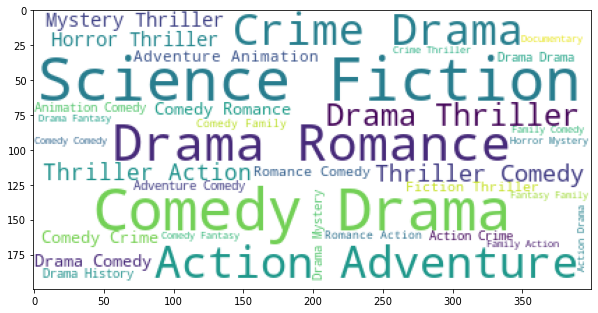

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=400, height=200, background_color = 'white', min_font_size=7)

gen_wc=wc.generate(data['Genres'].str.cat(sep=" "))
plt.figure(figsize=(10,15))
plt.imshow(gen_wc)

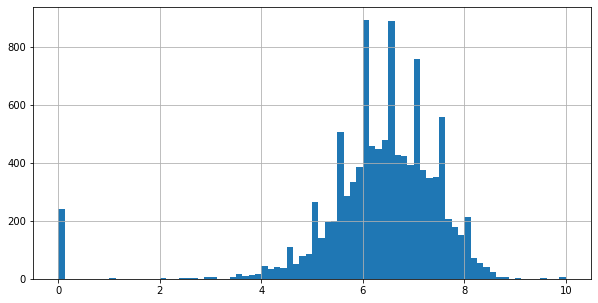

In [ ]:
plt.figure(figsize =(10, 5))
data['Rating_average'].hist(bins = 80)

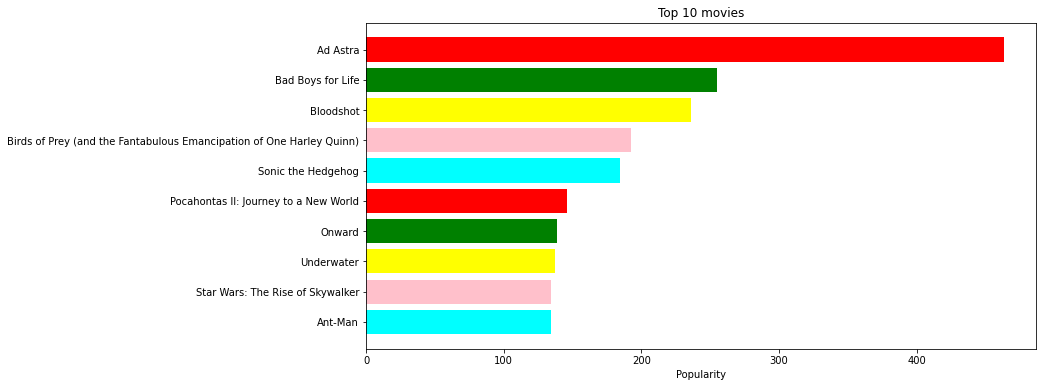

In [ ]:
Popularity = data.sort_values("Popularity", ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(Popularity["Title"].head(10), Popularity["Popularity"].head(10), align="center",color=['red','green','yellow','pink','cyan'])
plt.gca().invert_yaxis()
plt.title("Top 10 movies")
plt.xlabel("Popularity")
plt.show()

In [ ]:
data.columns

Index(['TMDb_Id', 'IMDb_Id', 'Title', 'Original_Title', 'Genres', 'Cast',
       'Crew', 'Collection', 'Release_Date', 'Release_Status',
       'Original_Language', 'Runtime', 'Popularity', 'Rating_average',
       'Rating_Count', 'Production_Companies', 'Country_of_Origin', 'Budget',
       'Revenue', 'year_of_release', 'movie_Id', 'tag_final'],
      dtype='object')

In [ ]:
data[data['Runtime']>=180]['Title']

75                                  Avengers: Endgame
149                                      The Irishman
180                                           Titanic
194                           The Wolf of Wall Street
198     The Lord of the Rings: The Return of the King
                            ...                      
10                                     The Green Mile
56                                  The Best of Youth
869                Fabrizio De André: Principe libero
1910                        Blue Is the Warmest Color
2968                                        King Kong
Name: Title, Length: 95, dtype: object

In [ ]:
Top_10=data.nlargest(10,'Runtime')[['Title','Runtime']]
set_index=('Title')

In [ ]:
Top_10

,Title,Runtime
9248,Crystal Lake Memories: The Complete History of...,400.0
56,The Best of Youth,366.0
6541,1900,317.0
7458,The Kingdom,273.0
9166,Gettysburg,254.0
6585,Cleopatra,248.0
1486,Kill Bill: The Whole Bloody Affair,247.0
7098,Hamlet,242.0
7811,Love Exposure,237.0
7947,A Brighter Summer Day,237.0


In [ ]:
data['year_of_release'].value_counts()

2019.0    641
2017.0    542
2018.0    523
2016.0    503
2014.0    479
         ... 
2023.0      1
1916.0      1
1923.0      1
1903.0      1
1915.0      1
Name: year_of_release, Length: 108, dtype: int64

In [ ]:
data[data['Revenue'].max()==data['Revenue']]['Title']


75    Avengers: Endgame
Name: Title, dtype: object

In [ ]:
top_10=data.nlargest(10,'Rating_Count')[['Title','Rating_Count']]
set_index=('Title')

In [ ]:
top_10

,Title,Rating_Count
81,Inception,25159
128,Deadpool,22246
87,The Avengers,21907
47,Interstellar,21605
89,The Dark Knight,21575
16,The Dark Knight,21575
132,Avatar,20789
404,Guardians of the Galaxy,20146
245,Fight Club,18679
218,Pulp Fiction,18018


In [ ]:
top_voted = data.sort_values(['Rating_Count'], ascending = False)

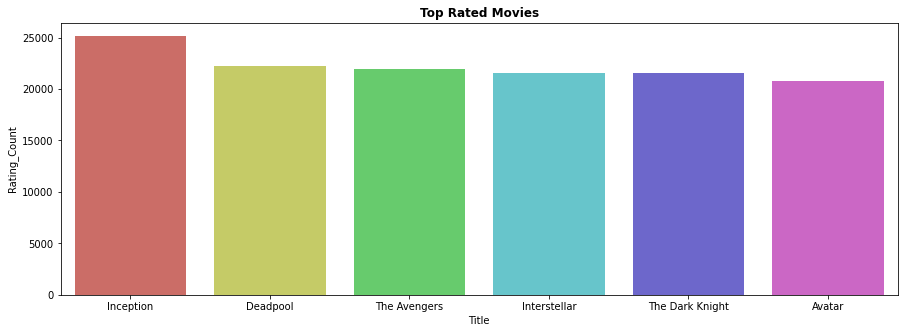

In [ ]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Title'][:7],y=top_voted['Rating_Count'][:7], palette = 'hls')
g.set_title("Top Rated Movies", weight = "bold")
plt.show()

# Recommendation System


In [ ]:
features=['Genres','Cast','tag_final','Original_Language','Production_Companies','Country_of_Origin']

In [ ]:
for feature in features:
  data[feature]=data[feature].fillna('')

In [ ]:
def combine_features(row):
  return row['Genres'] + ' '+row['Cast']+' '+ row['tag_final']+row['Original_Language']+row['Production_Companies']+row['Country_of_Origin']

In [ ]:
data['features']=data.apply(combine_features,axis=1)

In [ ]:
data['features'].head()

0    Drama , Science Fiction Brad Pitt , Tommy Lee ...
1    Action , Science Fiction Vin Diesel , Eiza Gon...
2    Action , Crime , Thriller Will Smith , Martin ...
3    Action , Adventure , Science Fiction Paul Rudd...
4    Adventure , Fantasy , Family Logan Lerman , Al...
Name: features, dtype: object

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
       y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear( )
  for i in text:
      y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
Data=data['features'].apply(transform_text)

In [ ]:
Data

0       drama scienc fiction brad pitt tommi lee jone ...
1       action scienc fiction vin diesel eiza gonzález...
2       action crime thriller smith martin lawrenc pao...
3       action adventur scienc fiction paul rudd micha...
4       adventur fantasi famili logan lerman alexandra...
                              ...                        
7071    comedi aldo baglio giovanni storti giacomo por...
7078    comedi massimo boldi vincenzo salemm enzo salv...
7081    comedi paolo ruffini guglielmo scilla andrea p...
7089    comedi veronica olivi beatric flammini flavia ...
7093    horror thriller stephen dorff natascha mcelhon...
Name: features, Length: 10886, dtype: object

In [ ]:
Data[0]

'drama scienc fiction brad pitt tommi lee jone ruth negga john ortiz liv tyler donald sutherland greg bryk loren dean kimberli elis john finn lisagay hamilton donni keshawarz bobbi nish sean blakemor freda foh shen kayla adam ravi kapoor elisa perri daniel sauli kimmi shield kunal dudhek alyson reed sasha compèr justin dray alexandria rousset natasha lyonn zoro saro manuel daghlian jacob sandler elizabeth willaman near futur time hope hardship drive human look star beyond mysteri phenomenon menac destroy life planet earth astronaut roy mcbride undertak mission across immens space mani peril uncov truth lost expedit decad boldli face empti silenc search answer seek outsid reachenglishnew regenc product keep head madriv pictur plan b entertain rt featur bona film group tsg entertainmentbrazil china unit state america'

# 1.  Content Based Recommendation System

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv= CountVectorizer()

In [ ]:
count_matrix=cv.fit_transform(Data)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_sim= cosine_similarity(count_matrix)


In [ ]:
cosine_sim[0]

array([1.        , 0.11953045, 0.06441021, ..., 0.02738442, 0.00810042,
       0.09914626])

In [ ]:
def recommendation(movie_title):
    id_of_movie= Data[data['Title']==movie_title].index[0]
    distances = cosine_sim[id_of_movie]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:10]
    
    for i in movie_list:
        print(data.iloc[i[0]].Title)

In [ ]:
# Build a code which will not give error when we type thhe "movie name" in different letter case or we type
# a name of any movie which is not in our datset
recommendation('Avatar')

Avatar 2
The Dark Knight
The Dark Knight
Star Trek Into Darkness
Fantastic Four
Idiocracy
X-Men Origins: Wolverine
Night at the Museum: Secret of the Tomb
The Dark Knight Rises


In [ ]:
recommendation('Iron Man')

Iron Man 2
Iron Man 3
The Avengers
Marvel Studios: Assembling a Universe
Avengers: Endgame
Avengers: Infinity War
The Incredible Hulk
Sherlock Holmes
A Time to Kill


#2.POPULARITY BASED RECOMMENDATION SYSTEM

In [ ]:
data.keys()

Index(['TMDb_Id', 'IMDb_Id', 'Title', 'Original_Title', 'Genres', 'Cast',
       'Crew', 'Collection', 'Release_Date', 'Release_Status',
       'Original_Language', 'Runtime', 'Popularity', 'Rating_average',
       'Rating_Count', 'Production_Companies', 'Country_of_Origin', 'Budget',
       'Revenue', 'year_of_release', 'movie_Id', 'tag_final', 'features'],
      dtype='object')

In [ ]:
df=data[['movie_Id','Rating_Count','Rating_average','Title','Popularity']]

In [ ]:
df

,movie_Id,Rating_Count,Rating_average,Title,Popularity
0,419704,2863,5.9,Ad Astra,463.487
1,338762,1384,7.2,Bloodshot,235.701
2,38700,2596,7.1,Bad Boys for Life,255.068
3,102899,13625,7.1,Ant-Man,134.294
4,76285,3547,5.9,Percy Jackson: Sea of Monsters,124.417
...,...,...,...,...,...
7071,419507,313,3.9,Fuga da Reuma Park,5.351
7078,103112,225,3.9,Olè,6.200
7081,238930,335,3.8,Fuga di cervelli,4.897
7089,35885,200,3.7,Amore 14,7.818


In [ ]:
df.isnull().sum()

movie_Id          0
Rating_Count      0
Rating_average    0
Title             0
Popularity        0
dtype: int64

In [ ]:
minimum_vote=df['Rating_Count'].quantile(0.90)
print(minimum_vote)

2622.5


In [ ]:
movies=df.copy().loc[df['Rating_Count']>=minimum_vote]
movies.shape

(1089, 5)

In [ ]:
movies.head()

,movie_Id,Rating_Count,Rating_average,Title,Popularity
0,419704,2863,5.9,Ad Astra,463.487
3,102899,13625,7.1,Ant-Man,134.294
4,76285,3547,5.9,Percy Jackson: Sea of Monsters,124.417
5,495764,2681,7.1,Birds of Prey (and the Fantabulous Emancipatio...,192.582
6,1571,3717,6.5,Live Free or Die Hard,101.430


In [ ]:
mean_vote=df[['Rating_average']]
mean_vote

,Rating_average
0,5.9
1,7.2
2,7.1
3,7.1
4,5.9
...,...
7071,3.9
7078,3.9
7081,3.8
7089,3.7


In [ ]:
def movie_score(x):
    v=x['Rating_Count']
    m=df['Rating_Count'].quantile(q=0.9)
    R=x['Rating_average']
    C=df['Rating_average'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [ ]:
df['score']=df.apply(movie_score, axis=1)

In [ ]:
data_highscore=df.sort_values(by='score', ascending=False)
data_highscore

,movie_Id,Rating_Count,Rating_average,Title,Popularity,score
97,278,15535,8.7,The Shawshank Redemption,57.663,8.356756
110,238,11774,8.7,The Godfather,38.681,8.267086
218,680,18018,8.5,Pulp Fiction,38.846,8.223459
16,155,21575,8.4,The Dark Knight,50.327,8.174948
89,155,21575,8.4,The Dark Knight,50.327,8.174948
...,...,...,...,...,...,...
2301,314,2109,4.4,Catwoman,11.803,5.466110
4024,351460,2798,4.2,Death Note,15.077,5.227359
2011,415,3127,4.3,Batman & Robin,20.305,5.222959
2305,14164,1153,2.6,Dragonball Evolution,11.502,5.186360


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_data=scaling.fit_transform(data_highscore[['score','Popularity']])
movie_normalized_data=pd.DataFrame(movie_scaled_data,columns=['normalized_score','normalized_Popularity'])
movie_normalized_data.head()


,normalized_score,normalized_Popularity
0,1.000000,0.123276
1,0.972158,0.082268
2,0.958611,0.082625
3,0.943549,0.107428
4,0.943549,0.107428


In [ ]:
data_highscore.shape

(10886, 6)

In [ ]:
movie_normalized_data.shape

(10886, 2)

In [ ]:
data_highscore.insert(0, "ID",np.arange(0,10886), True)

In [ ]:
data_highscore.head()

,ID,movie_Id,Rating_Count,Rating_average,Title,Popularity,score
97,0,278,15535,8.7,The Shawshank Redemption,57.663,8.356756
110,1,238,11774,8.7,The Godfather,38.681,8.267086
218,2,680,18018,8.5,Pulp Fiction,38.846,8.223459
16,3,155,21575,8.4,The Dark Knight,50.327,8.174948
89,4,155,21575,8.4,The Dark Knight,50.327,8.174948


In [ ]:
movie_normalized_data.insert(0,'ID',np.arange(0,10886),True)

In [ ]:
data_final=data_highscore.merge(movie_normalized_data,on='ID')
data_final.head()

,ID,movie_Id,Rating_Count,Rating_average,Title,Popularity,score,normalized_score,normalized_Popularity
0,0,278,15535,8.7,The Shawshank Redemption,57.663,8.356756,1.000000,0.123276
1,1,238,11774,8.7,The Godfather,38.681,8.267086,0.972158,0.082268
2,2,680,18018,8.5,Pulp Fiction,38.846,8.223459,0.958611,0.082625
3,3,155,21575,8.4,The Dark Knight,50.327,8.174948,0.943549,0.107428
4,4,155,21575,8.4,The Dark Knight,50.327,8.174948,0.943549,0.107428


In [ ]:
data_final['final_score']=data_final['normalized_score']*0.5+data_final['normalized_Popularity']*0.5
data_final=data_final.sort_values(['final_score'],ascending=False)
data_final[['movie_Id','Title','final_score']].head(10)

,movie_Id,Title,final_score
10481,419704,Ad Astra,0.650021
0,278,The Shawshank Redemption,0.561638
10,157336,Interstellar,0.538367
11,299536,Avengers: Infinity War,0.527495
1,238,The Godfather,0.527213
4,155,The Dark Knight,0.525488
3,155,The Dark Knight,0.525488
33,496243,Parasite,0.523791
35,475557,Joker,0.523140
2,680,Pulp Fiction,0.520618


<function matplotlib.pyplot.show(*args, **kw)>

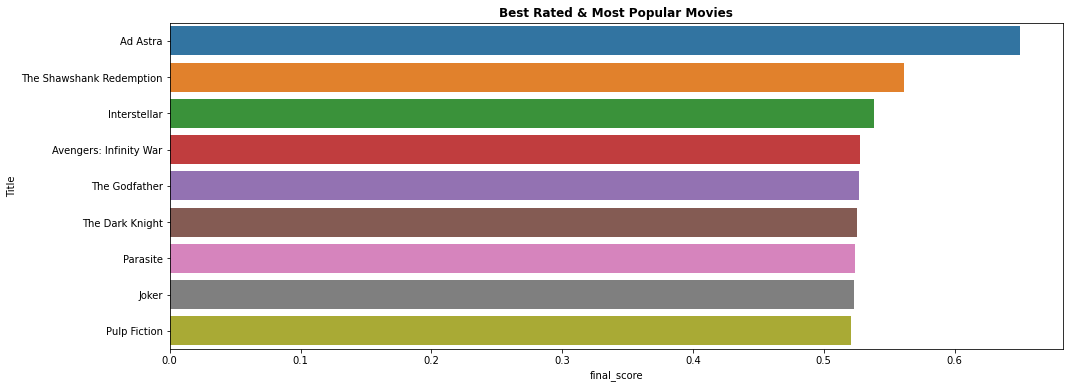

In [ ]:
scored_df=data_final.sort_values('final_score',ascending=False)
plt.figure(figsize=(16,6))

ax =sns.barplot(x=scored_df['final_score'].head(10),y=scored_df['Title'].head(10),data=scored_df)

plt.title('Best Rated & Most Popular Movies',weight='bold')


plt.savefig('scored_movies.png')
plt.show

#CONCLUSION:
-Using "Popularity Based Recommender System" we can see the top movies which are having highest rating and most popular